In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import the data files

In [66]:
New_Jersey_df = pd.read_csv('./cleaned_data/new_jersey')

In [62]:
new_jersey_prisoner_population = pd.read_csv('./cleaned_data/new_jersey_prisoner_population')

In [63]:
New_Jersey_df.head(3)

,as_of_date,total_staff_cases,staff_recovered,total_staff_deaths,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths
0,2020-03-26,4.0,NaN,0.0,0.0,NaN,0.0
1,2020-04-01,26.0,NaN,0.0,0.0,NaN,0.0
2,2020-04-08,110.0,NaN,NaN,18.0,NaN,0.0


# Set the date columns to be the indices

In [69]:
New_Jersey_df['as_of_date'] = pd.to_datetime(New_Jersey_df['as_of_date'])
New_Jersey_df.set_index('as_of_date', inplace=True)
New_Jersey_df.sort_index(inplace=True)
New_Jersey_df.head(3)

,total_staff_cases,staff_recovered,total_staff_deaths,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths
as_of_date,,,,,,
2020-03-26,4.0,NaN,0.0,0.0,NaN,0.0
2020-04-01,26.0,NaN,0.0,0.0,NaN,0.0
2020-04-08,110.0,NaN,NaN,18.0,NaN,0.0


In [71]:
New_Jersey_df['total_prisoner_cases'].pct_change().head()

as_of_date
2020-03-26         NaN
2020-04-01         NaN
2020-04-08         inf
2020-04-15    1.777778
2020-04-22    1.020000
Name: total_prisoner_cases, dtype: float64

# Data Viz

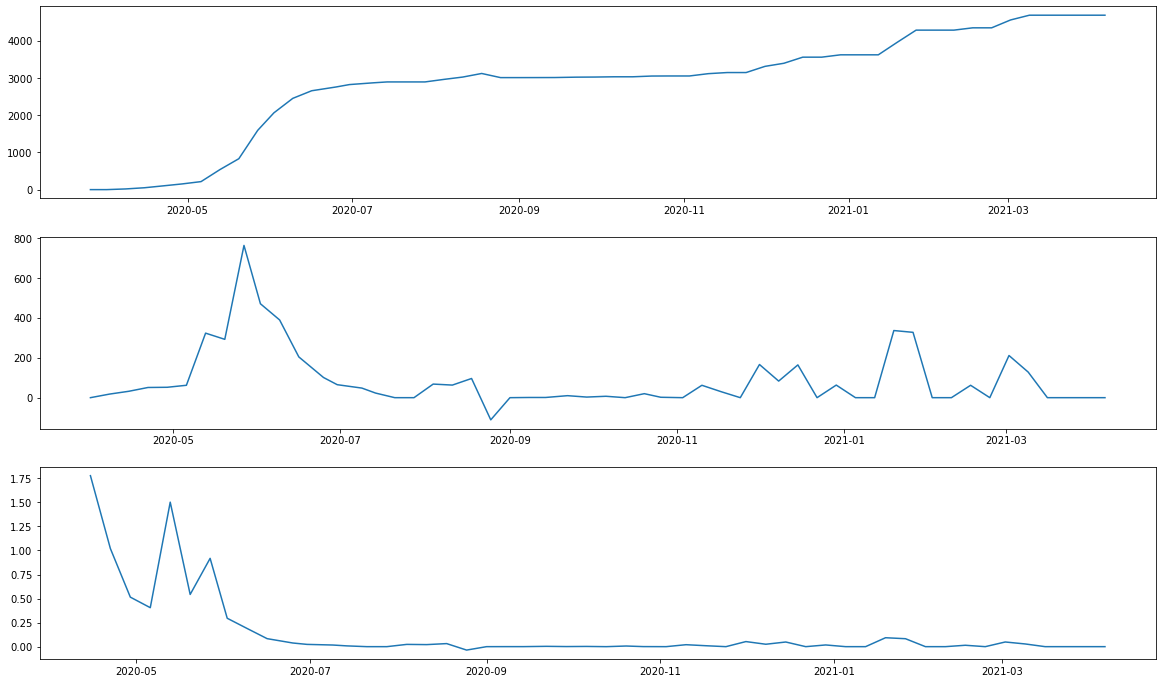

In [72]:
fig, axes = plt.subplots(nrows=3, figsize=(20,12))
axes[0].plot(New_Jersey_df['total_prisoner_cases'])
axes[1].plot(New_Jersey_df['total_prisoner_cases'].diff())
axes[2].plot(New_Jersey_df['total_prisoner_cases'].pct_change())

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

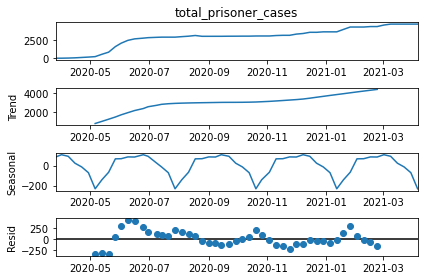

In [86]:
# Decompose time series into trend, seasonal, and residual components.
decomp = seasonal_decompose(New_Jersey_df['total_prisoner_cases'], period=12)

# Plot the decomposed time series.
decomp.plot();

In [81]:
New_Jersey_df.isnull().sum()

total_staff_cases         0
staff_recovered          44
total_staff_deaths       42
total_prisoner_cases      0
prisoners_recovered      55
total_prisoner_deaths     0
dtype: int64

# Saving to CSV

In [27]:
New_Jersey_df.to_csv('./cleaned_data/new_jersey')

In [189]:
new_jersey_prisoner_population.to_csv('./cleaned_data/new_jersey_prisoner_population')